In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


In [20]:
file_path = r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML471_S1_Datafile_Practice.csv"

df = pd.read_csv(file_path)

# If column name is DATE instead of Date, adjust here
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [21]:
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_30'] = df['Close'].rolling(window=30).mean()


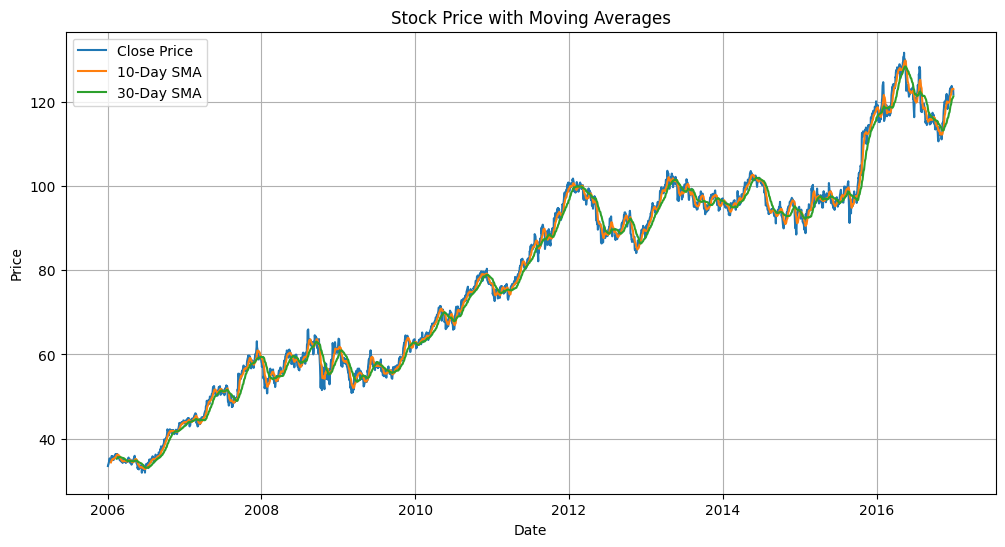

In [22]:
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA_10'], label='10-Day SMA')
plt.plot(df.index, df['SMA_30'], label='30-Day SMA')

plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()


In [23]:
ses_model = SimpleExpSmoothing(df['Close'], initialization_method='estimated')
ses_fit = SimpleExpSmoothing(df['Close']).fit(
    smoothing_level=0.05,
    optimized=False
)

df['SES'] = ses_fit.fittedvalues


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


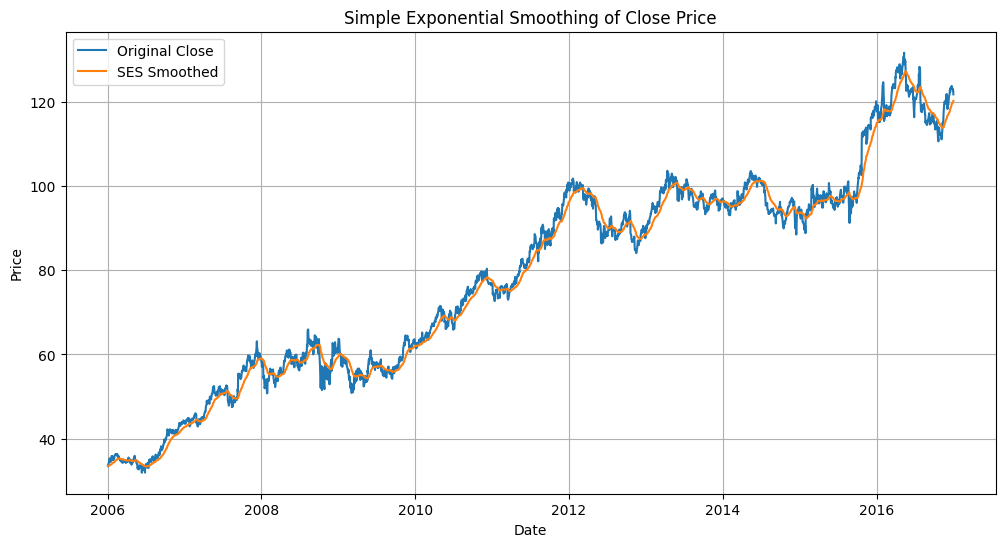

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Close'], label='Original Close')
plt.plot(df.index, df['SES'], label='SES Smoothed')

plt.title('Simple Exponential Smoothing of Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()
